In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [54]:
df=pd.read_csv("/content/Attrition.csv")

In [55]:
df

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,No,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,No,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,No,Sales,2,3,Medical,4,2,Married,5390,2,2,9


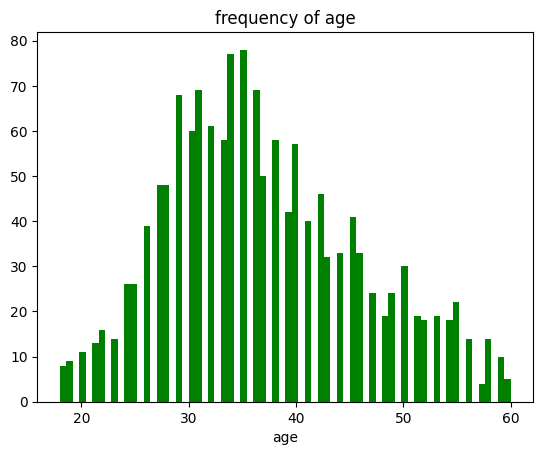

In [56]:
#frequency of age 
plt.hist(x=df["Age"],label="frequency of AGE",color="green",bins=70)
plt.title("frequency of age")
plt.xlabel("age")
plt.show()

In [57]:
df.isnull().sum()

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64

<Axes: xlabel='Age'>

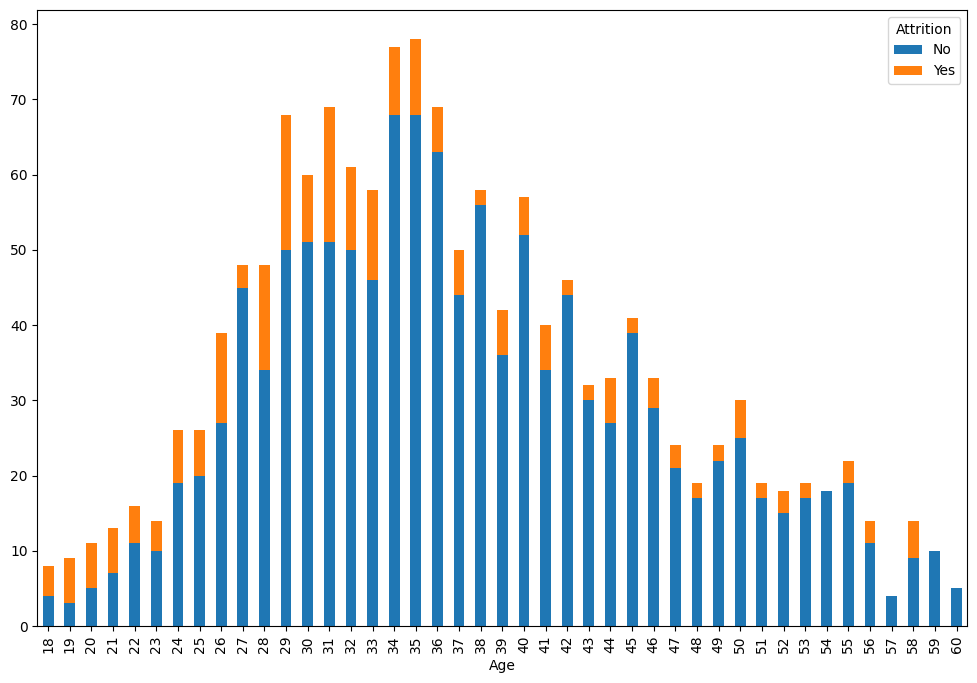

In [58]:
df.groupby(['Age', 'Attrition']).size().unstack().plot(kind='bar',stacked=True,figsize=(12, 8))

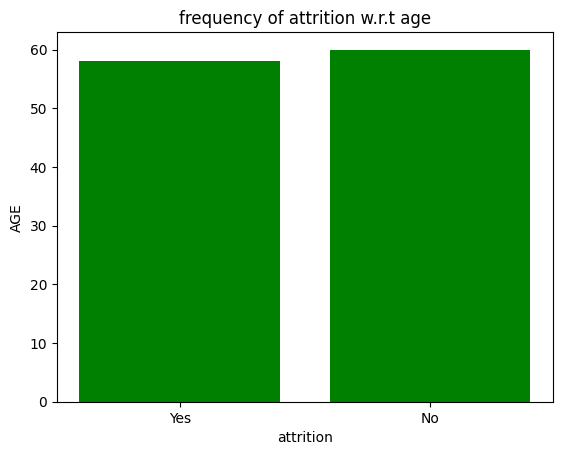

In [59]:
#frequency of age 
plt.bar(df["Attrition"],df["Age"],label="frequency of AGE",color="green")
plt.title("frequency of attrition w.r.t age")
plt.ylabel("AGE")
plt.xlabel("attrition")
plt.show()

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [61]:
# Filter the data to show only "Yes" values in the "Attrition" column
attrition_data = df[df['Attrition'] == 'Yes']

# Calculate the count of attrition by department
attrition_by = attrition_data.groupby(['Department']).size().reset_index(name='Count')

# Create a donut chart
fig = go.Figure(data=[go.Pie(
    labels=attrition_by['Department'],
    values=attrition_by['Count'],
    hole=0.4,
    marker=dict(colors=['#3CAEA3', '#F6D55C']),
    textposition='inside'
)])

# Update the layout
fig.update_layout(title='Attrition by Department', font=dict(size=16), legend=dict(
    orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1
))

# Show the chart
fig.show()

In [62]:
attrition_by = df.groupby(['MaritalStatus']).size().reset_index(name='Count')

# Create a donut chart
fig = go.Figure(data=[go.Pie(
    labels=attrition_by['MaritalStatus'],
    values=attrition_by['Count'],
    hole=0.4,
    marker=dict(colors=['#3CAEA3', '#F6D55C']),
    textposition='inside'
)])

# Update the layout
fig.update_layout(title='Attrition by Marital Status', font=dict(size=16), legend=dict(
    orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1
))

# Show the chart
fig.show()

In [63]:
from sklearn.preprocessing import LabelEncoder

In [64]:
la=LabelEncoder()

In [65]:
df["Attrition"]=la.fit_transform(df["Attrition"])

In [66]:
df["Attrition"].unique()

array([1, 0])

In [67]:
df["Department"]=la.fit_transform(df["Department"])
df["EducationField"]=la.fit_transform(df["EducationField"])
df["MaritalStatus"]=la.fit_transform(df["MaritalStatus"])

In [68]:
#split the dataset
from sklearn.model_selection import train_test_split

In [69]:
x=df.drop("Attrition",axis=1)
y=df["Attrition"]

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50,test_size=0.20)

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
lg=LogisticRegression()

In [73]:
model=lg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [74]:
predict=model.predict(x_test)

In [75]:
from sklearn.metrics import confusion_matrix,accuracy_score


In [84]:
print(accuracy_score(y_test,predict))

0.8344671201814059


In [86]:
from sklearn import metrics


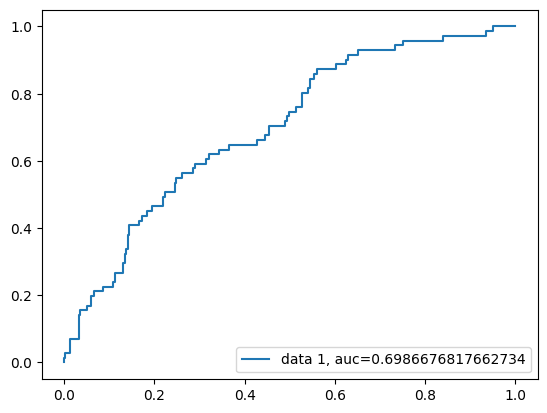

In [95]:
y_pred_proba = lg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [116]:
x=df.drop(["Attrition","WorkLifeBalance","JobSatisfaction","DistanceFromHome","EnvironmentSatisfaction"],axis=1)
y=df["Attrition"]

In [124]:

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50,test_size=0.2)

In [125]:
from sklearn.linear_model import LogisticRegression

In [126]:
lg=LogisticRegression()

In [127]:
model2=lg.fit(x_train,y_train)

In [128]:
predict=model2.predict(x_test)

In [129]:
print(accuracy_score(predict,y_test))

0.8231292517006803


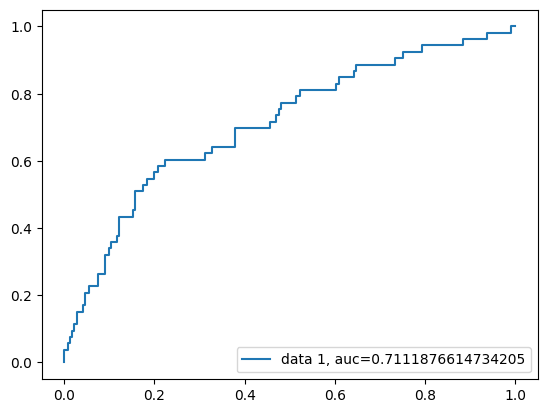

In [130]:
y_pred_proba = lg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()